In [31]:
import numpy as np

data = np.loadtxt(fname='./linear_data.csv', delimiter='\t')

# standardization
data -= data.mean(axis=0)
data /= data.std(axis=0)

x = data[:, :-1]
y = data[:, -1]

x.shape, y.shape

((1503, 5), (1503,))

In [32]:
N, M = x.shape

w = np.ones(M)
b = 0

#动量都初始化为0
momentum_w = np.zeros(M)
momentum_b = 0

In [33]:
def predict(x):
    return w.dot(x) + b

In [34]:
predict(x[0])

0.6590042695516543

In [35]:
def get_loss(x, y):
    pred = predict(x)
    loss = (pred - y) ** 2
    return loss

get_loss(x[0], y[0])

0.21258140154187277

In [36]:
def get_gradient(x, y):
    global w
    global b
    
    eps = 1e-3
    
    loss_before = get_loss(x, y)
    gradient_w = np.empty(M)
    
    for i in range(M):
        w[i] += eps
        loss_after = get_loss(x, y)
        w[i] -= eps
        gradient_w[i] = (loss_after - loss_before) / eps
        
    b += eps
    loss_after = get_loss(x, y)
    b -= eps
    gradient_b = (loss_after - loss_before) / eps
    
    return gradient_w, gradient_b

get_gradient(x[0], y[0])

(array([-0.61003339, -1.05581946,  1.66242713,  1.21242212, -0.59417855]),
 0.9231310135582593)

In [40]:
def total_loss():
    loss = 0
    for i in range(N):
        loss += get_loss(x[i], y[i])
    return loss

total_loss()

0.4987737320128442

In [45]:
plt_x = []
plt_y = []

for epoch in range(2500):
    i = np.random.randint(N)
    gradient_w, gradient_b = get_gradient(x[i], y[i])
    
    momentum_w = 0.8 * momentum_w + gradient_w
    momentum_b = 0.8 * momentum_b + gradient_b
    
    # 使用动量更新参数
    w -= momentum_w * 1e-3
    b -= momentum_b * 1e-3
    
    # 在时刻0, 动量都是0. 此时更新动量,动量就等于梯度.
    # 即在时刻0, 就是再用梯度下降.
    # 时刻1, 是上一个时刻的梯度乘以0.8,再加上当前时刻的梯度
    # 在时刻1, 差不多可以认为是梯度乘以了1.8. 不过这里面两部分的梯度是在两个不同的点上评估出来的.
    #在时刻2,差不多等同于时刻1.往后都差不多.

    
    plt_x.append(epoch)
    plt_y.append(total_loss())
    
    if epoch % 150 == 0:
        print(epoch, momentum_w, momentum_b, total_loss())

[-0.23025393  6.20105771 -5.50065747  4.03318901  2.18123151]
<<
1.1278508566393988
*****
0 [-0.23025393  6.20105771 -5.50065747  4.03318901  2.18123151] 1.1278508566393988 0.4971490538813927
[-0.27818872  4.48608443 -4.08254443  2.87859973  1.64455631]
<<
0.6369497449235109
*****
[ 0.20124052  3.8314132  -3.44194251  0.94197985  1.87867503]
<<
-0.5272855371415408
*****
[-0.27562215  2.59907488 -2.18422299  0.33647441  1.16623426]
<<
0.15653478867458748
*****
[ 0.22443949  2.08860057 -1.49630045 -0.61063491  1.25790542]
<<
-0.5451976859766892
*****
[ 1.02430658  1.6905056  -0.66966242 -2.33895555  1.68874157]
<<
-1.8458685459880162
*****
[ 1.04472977  1.40817063  0.09250301 -1.03284094  1.3170913 ]
<<
-0.8384968530471942
*****
[ 3.85125942 -2.43659034  1.50233954 -1.96497931 -6.40842575]
<<
-4.4911685252415054
*****
[ 4.77419742 -2.74927992  2.03743842 -4.50508882 -4.98541987]
<<
-5.8272538535550025
*****
[ 3.8355013  -2.2130436   1.62550894 -3.6118412  -4.00725788]
<<
-4.6871747902312

[ 1.5086469   2.30574612 -0.48376327  3.92392467 -3.26532887]
<<
-1.2274444958012785
*****
[ 0.64602097  2.44079623 -0.19293208  3.51501707 -2.22975251]
<<
-1.4998700817823192
*****
[ 0.45863756  2.05416875 -0.121534    2.87577105 -1.71891167]
<<
-1.2863151833644562
*****
[ 1.48305353  1.7334179   0.91705741  1.03518176 -1.20852709]
<<
0.0013114840180648013
*****
[0.73368618 2.478858   0.92177828 0.02602794 3.03622448]
<<
1.1116730595247086
*****
[-0.37979919  1.05134525  0.96647126  1.79630741  1.53518501]
<<
2.241327579734917
*****
[ 1.06323064 -0.86336639  2.86782767 -1.55909174  0.71891267]
<<
-0.48926565479112427
*****
[ 0.95415385 -0.60686198  2.06271496 -1.28607054  0.6410439 ]
<<
-0.5208992450443249
*****
[-0.18583141 -1.03273817  2.79710662 -1.8703894  -0.05383705]
<<
0.7483950841597795
*****
[ 0.61014038 -1.38404811  2.0581718  -2.88514408 -0.70012741]
<<
-0.4594042152277621
*****
[ 0.85320542 -2.40438206  3.19056084 -1.36883041 -0.74621677]
<<
-1.6643298801456425
*****
[ 0.2

[-6.87473248  4.57775139 -0.34188957 -2.70200822  3.97664879]
<<
1.153380145838271
*****
[-5.26895946  3.50229003 -0.01722824 -1.97523704  3.09105217]
<<
1.0643399420209858
*****
[-3.56923446  2.12074342  1.06049797 -2.31132075  2.11877306]
<<
1.4477276216926929
*****
[-3.88065692  1.84965747  1.39239546 -2.4466602   2.05298631]
<<
0.7027030762605327
*****
[-2.55782665  1.09664215  0.98873819 -1.51536667  1.38969903]
<<
0.8984704565855584
*****
[-2.30243471  1.15099925  0.87992617 -1.52250687  1.29178142]
<<
0.4821886212082115
*****
[-1.7261952   0.72502078  0.87415252 -1.16668247  0.91818233]
<<
0.5586737449365871
*****
[-0.30590874  0.60499409  1.37049371  0.36590936  1.46665755]
<<
-1.3475146428858555
*****
[-0.71809634 -0.20343975  1.68878913 -0.44521732  0.78910448]
<<
-0.47622010080251764
*****
[-0.32309403 -0.72549422  1.49283982 -0.85212822 -0.30218193]
<<
-0.7590337379732255
*****
[-0.4976871  -1.25139735  1.2937169   0.09000151 -0.66686118]
<<
-0.019769830138898214
*****
[-0.

[-2.24180949 -1.14810356  1.08823974 -0.49683519 -0.93141182]
<<
3.5372374885871585
*****
[-2.02223779 -1.16878     1.37983678 -0.6003674  -0.8992574 ]
<<
3.1120147528657154
*****
[-1.12833755 -0.66003473  0.05585866 -0.0571534  -0.4817534 ]
<<
1.9063575528190697
*****
[ 0.28094144  0.31269757 -1.71369029  1.2475692   0.48518328]
<<
-0.26112336115963974
*****
[ 2.83098779 -0.14998778  0.16406824  2.1175098  -0.01069271]
<<
0.6434232888301243
*****
[3.03784513 1.03299263 0.50208817 4.56761863 1.34963463]
<<
2.703117612970924
*****
[ 3.82662851 -2.81163699  1.93239664  4.86141801 -2.13303516]
<<
0.4951336868466343
*****
[ 2.90088525 -2.55500121  1.76777556  2.94310809 -2.33228143]
<<
1.7056799891263221
*****
[ 1.95167372 -1.7800933   1.005313    2.28631422 -1.72064515]
<<
1.1364854152129849
*****
[-8.26422305 -0.63136963  3.61734686  1.12420923  0.47149157]
<<
-1.4552961161539897
*****
[-19.85581665   2.2985239    0.4885228   -2.30829132   2.05052095]
<<
-3.6076700693339063
*****
300 [-1

[ 2.86305387 -1.21965712  0.30888883  0.42072666 -2.29906387]
<<
-0.9333009600840645
*****
[ 3.30072283 -1.19334465  0.40506953 -0.8085599  -2.25612208]
<<
0.18598725537390493
*****
[ 0.99986591  3.1625703  -2.39925708  2.36455172 -0.93913028]
<<
2.442115959516725
*****
[ 0.79259981  2.63141608 -2.07319149  1.95529028 -0.69756651]
<<
1.867423627359214
*****
[-0.7255442   0.27690982  1.21617473  0.41037395 -1.53354498]
<<
3.090832654812748
*****
[-1.31894921 -0.53513053  1.89616902 -0.34885493 -1.77340832]
<<
3.4105323173236393
*****
[ 2.37886839  2.65446892 -0.42146554  2.49919476  1.0418424 ]
<<
4.844194945988095
*****
[ 2.64297975  1.31570532 -0.01294718  0.86257718 -0.65692209]
<<
3.0092131035773226
*****
[3.30623664 1.07760022 0.66238535 2.90661203 0.18794807]
<<
0.6087123113821304
*****
[ 2.50743014  1.74357539 -0.05036138  2.96952795  0.3352972 ]
<<
0.9773424397756161
*****
[ 2.03650709  1.34131723 -0.01834458  2.35832474  0.15806979]
<<
0.7245316056259317
*****
[ 2.53848923  2.8

[-2.88340946  4.42317156 -2.57803172  0.49597394  1.37440792]
<<
1.9640701887828813
*****
[-1.88504319  3.24814924 -1.75895586 -0.66708524  1.15084012]
<<
0.760648584033667
*****
[-1.60331049  2.64890996 -1.5750629  -0.29034821  0.83905664]
<<
0.7935311278329304
*****
[ 0.58688657  0.94213117 -1.63872994 -3.16365465 -0.71511377]
<<
-1.5981770124262118
*****
[ 0.31040879  0.45052338 -1.09094684 -3.46917923 -1.19280443]
<<
0.020288553083430916
*****
[-0.36560188  2.35390819  0.72160968 -0.63497568  0.41160293]
<<
-1.720530980840986
*****
[ 0.59460902  1.26643677  0.37884897  0.33940629 -0.75574987]
<<
-2.546185347131222
*****
[ 0.24113401  0.79646578  0.56317045 -0.01248205 -0.62182588]
<<
-2.253575825890662
*****
[ 0.27167359  0.75086322  0.52264439 -0.26108438 -0.3635111 ]
<<
-1.994423496865631
*****
[ 0.05518297  1.09118538  0.09680607 -0.12786741 -0.17847485]
<<
-1.323030819477237
*****
[-0.80556427 -2.42376125  1.58560734 -1.76489482 -1.13325382]
<<
-2.3250611771379646
*****
[-1.505

[-8.75641695  6.80483089 -1.74241037  5.00044096  1.90415273]
<<
2.8323009473902094
*****
[-3.97233786 -5.58651393  3.64161418  7.06441507 -2.26557166]
<<
-1.9683993810217526
*****
[ 1.07825922 -5.71144333  5.42149231  7.48110905 -2.63524985]
<<
-0.1815311375601878
*****
[ 1.00219379 -4.3011818   4.42426708  6.27269398 -1.93710917]
<<
-0.3768295296094968
*****
[-0.69383097 -6.30475926  1.24845978  5.76303295 -3.5220745 ]
<<
2.198769387160077
*****
[-0.54315748 -5.03703222  0.99392053  4.63175566 -2.8036688 ]
<<
1.7312518126123797
*****
[-0.27292109 -3.90311202  0.44346291  3.84860721 -2.1499478 ]
<<
1.188751889061204
*****
[  2.56816678  -8.20918692   1.63099378  -1.4022326  -10.17736224]
<<
-2.4623649917102397
*****
[ 4.50898083 -7.07745207  3.260504    0.30464162 -8.6503266 ]
<<
-0.8837631618709123
*****
[ 4.81363906 -6.50091124  2.33846738 -1.84544101 -7.90842514]
<<
-2.298532391361794
*****
[ 5.23600803 -6.17616462  1.55248275 -2.52350279 -6.95092521]
<<
-0.9858132070524976
*****
[

[ 1.58199476 -1.89937395 -0.05224036 -3.06472767 -0.91160302]
<<
-1.8808642138844045
*****
[ 1.52486568 -1.41837837 -0.11509059 -1.91787286 -0.53543504]
<<
-1.9362478490043078
*****
[-0.28053192 -1.57918767  0.23048518  0.96541505 -1.45967308]
<<
0.35460089551504925
*****
[-0.17707892 -1.14690859  0.1559274   0.55340456 -1.05606012]
<<
0.11662118347663636
*****
[ 0.62607032 -1.673494    1.05462602  1.1760922  -1.14593796]
<<
-0.9188371681749555
*****
[ 0.67202751 -0.26019043  1.19060828  1.55075606  0.59427297]
<<
1.3121690285212675
*****
[-2.51591232  6.74266999 -3.64750832  2.3943351   2.07482587]
<<
4.921924155079613
*****
[-1.08620912  6.12204136 -4.4402287   3.82143113  2.37208477]
<<
2.3912251383997134
*****
[-0.62186408  4.85604229 -4.01918229  2.91556723  1.89655694]
<<
1.438600410799777
*****
[-0.3795887   3.50404177 -3.15881451  1.92372909  1.28836501]
<<
1.485189230463325
*****
[-1.18857824  4.31877272 -3.4789549   0.78796544  2.38541783]
<<
2.228131719059988
*****
[-0.54687

[ 0.36654043 -1.4757804   5.14812195 -0.37318811  0.27907129]
<<
-2.089821201200793
*****
[-2.38551689  0.29094821  0.31272174 -4.23932672 -1.36659306]
<<
1.5321511894088404
*****
[-1.88802132  0.1717616   0.49104852 -3.06977336 -1.2032925 ]
<<
1.4704223977959414
*****
[ 2.219879    1.7892031  -1.56741901 -0.2872738  -0.83194808]
<<
2.8277019229631835
*****
[-0.2698428   2.20499033 -0.63532637 -0.43049286 -0.13309765]
<<
1.5894772810297246
*****
[-2.42110423  6.41173061 -3.58291974 -3.52810881  1.17793983]
<<
3.86049719123293
*****
[-0.4961678   3.33306756 -0.65885968 -5.9801652   0.40567357]
<<
0.6830323759794812
*****
[-0.48512386  2.57972497 -0.58223705 -4.73995782  0.22452066]
<<
0.6953604305726889
*****
[-0.1680127   2.24660276 -0.59836558 -4.81726694  0.60405082]
<<
-0.22494708943803687
*****
[  2.88338788 -10.07366888   4.94024092  -0.55643723  -3.59427   ]
<<
-4.736746628292149
*****
[ 2.56139974 -7.90726517  3.63614871 -0.04727296 -2.72701718]
<<
-4.11043098348418
*****
[ 1.79

[ 1.07131709 -2.18809108 -2.0388004   1.27189271 -2.83386963]
<<
-1.4589086956373283
*****
[ 0.47919168 -2.1538087  -1.13809002  0.6565293  -2.55850664]
<<
-0.6663541131292717
*****
[ 0.05443438 -1.55209131 -1.17348966  0.63278515 -1.95594555]
<<
-0.6800604127583323
*****
[-0.45479018  0.41196199 -1.60096329 -0.77510236  2.44227116]
<<
1.2290714759481334
*****
[-0.41752987  0.45351463 -1.32995078 -0.58066715  2.21545384]
<<
1.116220276280275
*****
[-1.01956498 -0.35170791 -0.88827729  0.8976366   1.08693902]
<<
1.9301632764160175
*****
[-0.32356238 -0.63013424  0.66089352 -0.28844572  0.34051668]
<<
2.9373825254548045
*****
[-0.3455035  -0.66922251  0.64857992 -0.0200021  -0.0933632 ]
<<
3.0578211585553055
*****
[0.27197874 0.0038793  0.86118736 1.11240179 0.52648082]
<<
1.5316895103375492
*****
[0.09542411 0.40114295 0.34925321 0.43728963 0.65848142]
<<
0.8802906736135299
*****
[-1.13286844  2.38995738  2.4247061  -2.01654209  2.00091534]
<<
-1.098434149235518
*****
[-1.69166209  0.74

[  2.55985106  -5.76243016   3.60757463  -3.96644328 -10.9565609 ]
<<
-4.68043898505997
*****
[ 1.96068531 -4.85399439  2.69063534 -3.43506965 -8.93277877]
<<
-3.529321290975544
*****
[ 1.87724508 -3.35203628  1.0869556  -2.31786309 -6.81973518]
<<
-3.416460581730746
*****
[ 0.44243497 -3.7026278   1.12054123  0.0910281  -6.43520341]
<<
-1.2518252749122687
*****
[-1.27744962 -3.87542258 -2.34251125 -1.89858614 -7.26950755]
<<
1.7256694923419214
*****
[ 1.55136252  0.44118063 -2.76137412 -3.23604462  1.72872033]
<<
3.7561968331728686
*****
[ 1.17895651  0.1147687  -1.70911684 -3.21123801  1.1499253 ]
<<
3.5128738295891178
*****
[ 1.48531912  0.44781857 -2.11104947 -2.79434969  1.31462845]
<<
2.054779651275722
*****
[ 1.11188623  0.0479638  -1.42029681 -2.56851267  0.87809692]
<<
1.9166350451167422
*****
[ 0.61763049 -0.72437807 -1.38519054 -1.17803126  0.19964521]
<<
2.20079564486735
*****
[ 0.72475366 -0.95587805 -0.1323113  -2.01703467  0.59236586]
<<
0.9418447908947785
*****
[ 0.6207

[-0.7231873  -2.69385209  1.83598336 -2.13740072 -1.291429  ]
<<
1.9625842037714898
*****
[-0.61198865 -2.09583993  1.42001373 -1.64621316 -1.00038377]
<<
1.5205375697429755
*****
[-0.30214586 -1.85451786  1.64092971 -1.2337913  -0.94035545]
<<
1.49625040464672
*****
[ 1.02980196 -0.64852024 -1.8781982  -3.31607818  0.08008081]
<<
-0.5772349137595083
*****
[ 0.13277471 -1.71495865 -1.89280248 -3.40789749 -0.70426645]
<<
0.5837459358164931
*****
[-1.89395858  2.04912218  2.03290835  0.94675897  1.8653776 ]
<<
-2.5150511446297408
*****
[-1.20906953  1.91140761  1.7990237   1.32719245  1.79567581]
<<
-2.4727457044633705
*****
[-0.0795193  -0.42105895  2.66909873  0.66242891 -0.19860987]
<<
-3.3174799884178783
*****
[-1.74796529  0.85636797  3.08951259 -0.83337555  0.66421209]
<<
-3.6926715717319243
*****
[-2.64174142 -1.46745185  0.74959388  1.80176455 -0.9542813 ]
<<
-1.0743384511107825
*****
[-1.98889562 -1.39857483  1.23621648  1.18733736 -0.92873581]
<<
-0.506498238151075
*****
[-0.52

[-0.57571392 -0.55056551  3.58966356  0.26502641  1.18575589]
<<
-2.5957017959780426
*****
[-0.39940228 -0.55482001  2.85187715  0.05975526  0.62491989]
<<
-2.192847997103043
*****
[-0.11115008 -0.62775365  2.75930083  0.54261048  0.69914812]
<<
-2.1540647073419397
*****
[-1.481596   -1.84444068  2.5373369   2.99063919 -0.72824639]
<<
0.2236377893059689
*****
[ 0.46257291 -1.64463405  0.12864349  3.79076866 -0.76018585]
<<
-1.7524103082061742
*****
[ 1.25545602 -1.66312343  0.80787488  2.75103532 -0.82200732]
<<
-1.0109305238971418
*****
[ 1.52264857 -1.31846124  0.96983038  3.26734228 -0.31447709]
<<
-1.6730282859493966
*****
[ 1.16381672 -0.6278243   0.59940122  2.47453662  0.12490242]
<<
-1.1440702680554795
*****
[ 0.45876427 -1.54429371  1.3764075   3.17626372 -0.52244524]
<<
-0.004149934262094757
*****
[ 1.0401434  -1.68038716  1.42402263  1.16385249 -1.32897595]
<<
1.9022788648740172
*****
[-0.50751423 -2.20884327 -1.9266574  -0.93500498 -3.07119137]
<<
4.103349156934692
*****
[-

[-0.02790988 -0.85557115 -2.13037838 -2.38752471 -2.1113902 ]
<<
1.2194636248278927
*****
[ 0.01762074 -1.52650125 -1.31573002 -2.33594478 -1.94316058]
<<
0.6508512513914042
*****
[ 0.98539511 -1.1986348  -0.44619275 -0.69487816 -0.89307772]
<<
-1.1004421970993805
*****
[ 0.83102853 -0.92343616 -0.3826218  -0.60098644 -0.63570364]
<<
-1.0309365002460384
*****
[ 1.84838329  0.03856891 -1.93174983  1.55449302  0.25200945]
<<
-2.476131778522919
*****
[ 1.25759412  0.09968136 -0.77024544  2.27787127  0.15976423]
<<
-1.1934591372181003
*****
[ 3.95061308 -0.97227138  0.66672223  3.5337934  -0.68505317]
<<
0.3484847019664383
*****
[ 2.95452816 -0.84149181  0.57964434  2.90840704 -0.68900957]
<<
0.5525448300071794
*****
[ 2.22906386 -0.5956909   0.64981874  3.76959845 -0.85335244]
<<
1.540690154103777
*****
[-13.16387028   3.64759413   4.79595923  -1.70433369   2.25591453]
<<
-2.3627685787283847
*****
[-10.90241674   1.86761822   5.0876483   -2.7418799    1.72150269]
<<
-2.940399026876838
***

[-0.8394774  -1.82037031 -2.46457628 -5.84918899 -4.79741426]
<<
0.5364736605999645
*****
[-0.52360103 -1.39382431 -2.13135006 -4.49967757 -3.90913706]
<<
0.5657147937398217
*****
[-0.06822193 -0.71101246 -2.54940059 -2.54136029 -2.73196914]
<<
-0.4051047868282952
*****
[ 0.51892111  0.69811984 -3.12532833 -1.23400068 -1.46251877]
<<
-1.427072252631885
*****
[ 0.2724607   2.51528987 -0.93524796  1.11376989  0.17068419]
<<
-2.846410378511185
*****
[ 1.52503671  0.53899855  1.06251793  2.31920011 -0.45009166]
<<
-4.249821766105153
*****
[ 1.91924721  0.89037144 -0.10969533  1.56462588  0.14898685]
<<
-4.3747506080531195
*****
[-0.82998683  2.01179226 -3.44827702 -2.22802006 -1.284697  ]
<<
-0.6703878056154586
*****
[-1.00519663  1.74247497 -2.65241333 -1.6394756  -0.93686849]
<<
-0.6502148009665542
*****
[-0.60766892  1.20310458 -1.48071914 -2.22672243 -0.4388135 ]
<<
-1.21750463320515
*****
[-0.68375927  0.55864513  0.40331101 -2.94692245 -0.96362791]
<<
0.6390458720567309
*****
[ 0.776

[ 0.15515027 -0.25988915 -0.29544887 -1.11820557  0.27900437]
<<
-3.7152578822606173
*****
[ 0.48344933 -0.69976854 -0.32128793 -1.55083781 -1.18607576]
<<
-3.4723712727215132
*****
[-0.19028159  0.57933821 -0.54198462 -1.79192499  1.48144291]
<<
-2.014082467634542
*****
[ 0.46192031  0.05752146 -0.13898916 -3.57076278  0.40743511]
<<
0.12740230588073098
*****
[ 0.27677867  0.16838502 -0.15973944 -3.01543529  0.63599749]
<<
0.23319385485291833
*****
[ 1.88634109 -0.91339022 -0.4650068   0.03774215 -1.62968619]
<<
-1.801848293816232
*****
[-0.19819565 -1.23645464 -0.00500334  2.87412969 -2.47723096]
<<
0.7242984516990443
*****
[-0.05382345 -1.38131585  1.0126607   3.35209651 -1.55751248]
<<
-0.27369693947840734
*****
[ 0.3620273  -2.50104855  1.73824497  2.44942763 -1.56791868]
<<
-0.9975982149851671
*****
[ 1.43726247 -3.42953815  1.1441657   0.05243849 -5.35780897]
<<
-2.2509411282384564
*****
[ 0.93574138 -1.83753845  0.53763945 -0.25612013 -3.48669324]
<<
-1.3869564822562608
*****
[

[ 0.09507619  4.97515437 -2.63302866  5.06045114 -0.71725012]
<<
3.080360143812662
*****
[ 0.39519547  3.36943623 -1.71979936  3.92307782 -1.08603397]
<<
2.0445869163118178
*****
[ 0.23760946  2.17822027 -0.74406778  2.67547133 -1.24256114]
<<
2.2774623212241347
*****
[-2.60857456  2.79915922  0.24968835  0.93353839 -0.26523227]
<<
0.9024656153793025
*****
[-1.35658401  2.90073999 -2.32669532  1.764324    0.35945974]
<<
-0.6829545458673025
*****
[-1.13995141  2.11099113 -1.42118699  1.99895681  0.0457473 ]
<<
-0.0992077351664083
*****
[-0.53866136  1.39226723 -1.23239725  1.43141207 -0.37860786]
<<
-0.6415817606436011
*****
[ 0.83889965  0.95868469 -2.73018401  2.42805279 -0.46582058]
<<
-2.2851403216585595
*****
[ 2.1959831   0.32596727 -0.49289555  3.1758974  -0.81219703]
<<
-0.8889613761232935
*****
[ 1.7684618   0.32198637 -0.56220572  2.4175718  -0.59968931]
<<
-0.8052765480713082
*****
[ 1.70471385 -0.27446698 -0.11264183  2.1998456  -0.9556228 ]
<<
-1.0099411256704123
*****
[ 1.

[ 2.54879325  2.91772957 -0.17687623  2.75436869  4.27328991]
<<
-0.017533593095301114
*****
[ 1.9192327   2.49178069 -0.20416647  1.99817823  3.81699723]
<<
0.1550183931620886
*****
[ 1.54036775  1.99350161 -0.16112847  1.60685805  3.05594494]
<<
0.1194894219466805
*****
[-0.69611123 -1.74399966 -2.79979535 -2.29903597  0.15640637]
<<
3.010152801564254
*****
[ 1.84006271 -4.34590886 -1.05691279 -2.78225096 -6.05407151]
<<
-0.7556052841145746
*****
[ 1.47308126 -3.47653126 -0.84560397 -2.2258921  -4.84267609]
<<
-0.6040887059689087
*****
[ 2.4754158  -3.25040475 -0.97447116 -0.73167675 -4.42655435]
<<
0.3154173605989814
*****
[ 1.72915367 -3.03472687 -0.40445988 -0.47198804 -3.79656146]
<<
0.6334073302573365
*****
[ 2.95368206 -1.58975258 -1.19828603 -2.07028884 -2.80224273]
<<
2.8485480533159238
*****
[ 2.44634335 -0.84564213 -1.23732918 -1.58591372 -2.14426912]
<<
2.515499167183152
*****
[-2.15311176  8.14609685 -6.82954669  0.19580762  0.31485063]
<<
6.927544741829877
*****
1950 [-2

[-10.55981285   0.20003498   2.72966195  -2.35820933   1.43462283]
<<
-1.975502294202776
*****
[-6.99389248  1.06291266 -1.26657579 -0.49766909  1.92805272]
<<
-3.498783957067363
*****
[-9.80993132  9.89741313 -7.00161244  1.10367671  3.62437839]
<<
2.2411938182227957
*****
[-8.14554678  8.47596578 -5.42184048  1.19844185  3.68133263]
<<
2.8523585688686945
*****
[-6.12330967  6.46846357 -4.43799728  0.18168848  2.57724678]
<<
1.6897206746617406
*****
[-5.00853236  4.75342549 -2.66700421  1.32398934  1.57564358]
<<
2.24917622228784
*****
[-2.07859766  1.5248987  -1.22031749  2.82704063 -4.25195007]
<<
-0.6429279148656704
*****
[-1.8944383   0.91893816 -0.19549896  2.73642744 -3.07004389]
<<
-1.1690070857073933
*****
[-1.00036611  1.53742475 -1.13165011  3.41122621 -1.89626521]
<<
-1.9258862654012396
*****
[-0.31658293  0.04599165  0.50419093  3.58640779 -1.6868964 ]
<<
-2.7243495325895837
*****
[1.91640351 1.09208568 0.74276102 3.46582538 0.12885111]
<<
-0.17647860751134292
*****
[ 2.22

[-7.86735901 -0.88934504 -0.80582388 -0.47854435  0.33507702]
<<
-1.5561250502775634
*****
[-5.91426774  0.89142653 -1.04590198  1.02893263  2.93635165]
<<
-0.1699367194922905
*****
[-1.6364005   0.84770365 -0.51361545  3.32710746  1.82441771]
<<
1.770885308025908
*****
[-0.17369043  0.76980391  0.62092035  4.03827529  1.40381798]
<<
2.464877567552946
*****
[-0.31756833  0.95093765  0.60446966  2.45014061  1.80754209]
<<
2.608252088937174
*****
[ 0.11923174  1.12121933 -0.52654384  1.2223972   1.74117284]
<<
1.524406282894435
*****
[0.22583251 0.47548509 0.24560157 1.46386492 1.1555438 ]
<<
1.58933480543705
*****
[0.18222798 0.39616726 0.18502934 1.1807421  0.93312254]
<<
1.259850158281916
*****
[ 0.0243425   1.26508825 -0.2473348   1.51358496  1.50477736]
<<
1.4409406362047024
*****
[-1.2284479  -0.14041937  1.1742608   2.0455456   1.03844832]
<<
0.0005619891978676517
*****
[-0.99017862 -0.00922974  0.8529699   1.74723748  0.8880139 ]
<<
-0.08734250312567292
*****
[-0.30519564  1.0684

[-1.92207666  0.63137997 -0.47151502  1.09965283  0.10515888]
<<
0.01218174734456512
*****
[-8.62297717  4.10754744  3.35797262 -0.05630111  2.64818273]
<<
-3.130496757858622
*****
[-6.14832335  7.92476137  0.74107222 -1.57967183  6.21387893]
<<
-0.38109819521288335
*****
[-4.82214657  6.60364529  1.52981822 -0.29347599  5.58295455]
<<
-1.0909597477650963
*****
[-2.89363753  4.26510667  2.09993947 -1.32742456  3.89764471]
<<
0.01720741851718366
*****
[-2.52026764  3.24147606  1.80380289 -1.95944431  2.79131724]
<<
0.7451957392131052
*****
[-2.6560237   3.20009837  3.59706683 -0.25705205  3.64329932]
<<
-1.213847106324533
*****
[ 1.00528647 -8.82449641  8.07474739  2.95673343 -0.99587039]
<<
-5.341231928838027
*****
[ 0.93316643 -6.77712288  5.89539738  1.95290932 -0.60981836]
<<
-4.587462809141834
*****
[ 1.23576545 -5.12143238  3.53779697 -0.00906814  0.05426462]
<<
-4.867140055231142
*****
[ 2.07477887 -3.95547833  4.42483214 -1.17772824  0.19220793]
<<
-2.2738479818420902
*****
[ 1.

[-3.46082065  4.13076807 -1.06559348 -2.71581067  3.61835428]
<<
2.1546118242790837
*****
[ 0.40961415  2.33505104 -0.61413428 -3.18900489  2.01904642]
<<
3.130491412581888
*****
[ 1.79674912  2.65200264 -1.30957372 -4.13464404  1.83507999]
<<
4.695169403523828
*****
[ 1.74391623  2.06999842 -1.62729994 -3.48339253  1.46668573]
<<
3.1673302554753615
*****
[ 0.41305961  1.07043714 -0.07470837 -2.41543319  0.52422825]
<<
3.780445705950266
*****
[ 0.60841999  0.40268216  1.11606952 -0.71473252  0.91013444]
<<
2.0373079036314596
*****
[ 2.50183858  0.09871765 -1.61975076  2.57245608  0.31493421]
<<
-0.9225371126151656
*****
[ 2.07095427  0.15166216 -0.47720214  3.15018429  0.20775581]
<<
0.09354867987878202
*****
[-0.17370457  0.39391865  0.5862486   1.45418753  0.80343468]
<<
-0.7373646699747122
*****
[-0.28766443  0.02097449  0.82899454  1.64391781  0.41537525]
<<
-0.2241791680759444
*****
[ 1.22763958 -6.32175034  3.55875344  3.0769006  -1.84561245]
<<
-2.6132029502427745
*****
[ 1.0282

[-0.3851153   1.88905216 -4.50793195 -3.06348691  0.16807979]
<<
0.46495600839364437
*****
[-0.02234696  1.75242139 -4.28073567 -2.94352553  0.33191296]
<<
-0.0036415764546713913
*****
[-0.60005959  2.96645351 -4.07880357 -1.41520488  1.51723536]
<<
0.7124340322129242
*****
[-0.47672163  2.3289894  -3.18841173 -1.07834468  1.18861913]
<<
0.6106258130541602
*****
[-0.00823565  2.50516812 -3.83960214 -0.34270515  1.34553867]
<<
-0.22861793248361734
*****
[-0.53132818  2.65265823 -1.70876888  0.80078497  2.16314269]
<<
-1.66725210643509
*****
[ 0.78430118  2.21974047 -0.26800938 -0.16568679  1.83304007]
<<
-0.2173751973575937
*****
[ 0.60973422  1.76134818 -0.16936786 -0.1003229   1.45454264]
<<
-0.14966768552297993
*****
[ 0.98896318  1.27515878 -0.41640335 -0.30198432  0.93948884]
<<
0.18851796293745918
*****
[ 0.65475429  0.76017618 -0.14445096 -1.04600642  0.21940201]
<<
1.2646199909486187
*****
[ 1.85017711  0.44610089 -1.93757295 -1.38858126  0.17119416]
<<
-0.839156166801706
*****


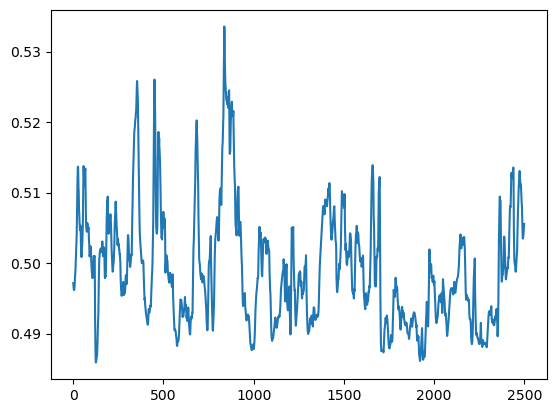

In [46]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(plt_x, plt_y)
plt.show()